In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
from decimal import Decimal
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# New Section

In [4]:
import pandas as pd
import io
df = pd.read_csv("houserentdhaka.csv")

print(df)

       Unnamed: 0                                           Location  \
0               0                    Block H, Bashundhara R-A, Dhaka   
1               1                           Farmgate, Tejgaon, Dhaka   
2               2  Block B, Nobodoy Housing Society, Mohammadpur,...   
3               3                          Gulshan 1, Gulshan, Dhaka   
4               4                                   Baridhara, Dhaka   
...           ...                                                ...   
28795        4795                           Section 2, Mirpur, Dhaka   
28796        4796                    Block F, Bashundhara R-A, Dhaka   
28797        4797         RK Mission Road, Gopibag, Motijheel, Dhaka   
28798        4798                Ullan, West Rampura, Rampura, Dhaka   
28799        4799                               Vatara, Badda, Dhaka   

             Area  Bed  Bath        Price  
0      1,600 sqft    3     3  20 Thousand  
1        900 sqft    2     2  20 Thousand  
2  

In [5]:
df.shape

(28800, 6)

In [6]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [7]:
df.head()

,Location,Area,Bed,Bath,Price
0,"Block H, Bashundhara R-A, Dhaka","1,600 sqft",3,3,20 Thousand
1,"Farmgate, Tejgaon, Dhaka",900 sqft,2,2,20 Thousand
2,"Block B, Nobodoy Housing Society, Mohammadpur,...","1,250 sqft",3,3,18 Thousand
3,"Gulshan 1, Gulshan, Dhaka","2,200 sqft",3,4,75 Thousand
4,"Baridhara, Dhaka","2,200 sqft",3,3,75 Thousand


In [8]:
df.isnull().sum()

Location    0
Area        0
Bed         0
Bath        0
Price       0
dtype: int64

In [9]:
df['Area']=df['Area'].str.replace(',','')

In [10]:
df.head()

,Location,Area,Bed,Bath,Price
0,"Block H, Bashundhara R-A, Dhaka",1600 sqft,3,3,20 Thousand
1,"Farmgate, Tejgaon, Dhaka",900 sqft,2,2,20 Thousand
2,"Block B, Nobodoy Housing Society, Mohammadpur,...",1250 sqft,3,3,18 Thousand
3,"Gulshan 1, Gulshan, Dhaka",2200 sqft,3,4,75 Thousand
4,"Baridhara, Dhaka",2200 sqft,3,3,75 Thousand


In [11]:
df['Area'] = df['Area'].apply(lambda x: int(x.split(' ')[0]))

In [12]:
df.head()

,Location,Area,Bed,Bath,Price
0,"Block H, Bashundhara R-A, Dhaka",1600,3,3,20 Thousand
1,"Farmgate, Tejgaon, Dhaka",900,2,2,20 Thousand
2,"Block B, Nobodoy Housing Society, Mohammadpur,...",1250,3,3,18 Thousand
3,"Gulshan 1, Gulshan, Dhaka",2200,3,4,75 Thousand
4,"Baridhara, Dhaka",2200,3,3,75 Thousand


In [13]:
df.Bed.unique()

array([3, 2, 4, 1, 5, 6], dtype=int64)

In [14]:
df.Bath.unique()

array([3, 2, 4, 5, 1, 6, 8], dtype=int64)

In [15]:
df[df.Bed>5]

,Location,Area,Bed,Bath,Price
304,"Gulshan 2, Gulshan, Dhaka",4500,6,6,2.8 Lakh
24464,"Tejturi Bazar, Tejgaon, Dhaka",2450,6,6,60 Thousand


In [16]:
df[df.Bath>6]

,Location,Area,Bed,Bath,Price
533,"Gulshan 2, Gulshan, Dhaka",4200,4,8,3 Lakh


In [17]:
df1 = df.copy()

In [18]:
def price_float(x):
    y = x.split(' ')[1]
    if y == "Thousand":
        return float(x.split(' ')[0]) * 1000
    else:
        return float(x.split(' ')[0]) * 100000

In [19]:
df1.Price = df1.Price.apply(price_float)

In [20]:
df1.loc[304]

Location    Gulshan 2, Gulshan, Dhaka
Area                             4500
Bed                                 6
Bath                                6
Price                        280000.0
Name: 304, dtype: object

In [21]:
df1['price_per_sqft'] = df1['Price']/df1['Area']

In [22]:
df1.head()

,Location,Area,Bed,Bath,Price,price_per_sqft
0,"Block H, Bashundhara R-A, Dhaka",1600,3,3,20000.0,12.500000
1,"Farmgate, Tejgaon, Dhaka",900,2,2,20000.0,22.222222
2,"Block B, Nobodoy Housing Society, Mohammadpur,...",1250,3,3,18000.0,14.400000
3,"Gulshan 1, Gulshan, Dhaka",2200,3,4,75000.0,34.090909
4,"Baridhara, Dhaka",2200,3,3,75000.0,34.090909


In [23]:
len(df1['Location'].unique())

730

In [24]:
df1['Location']=df1['Location'].str.replace(',','')

In [25]:
df1.head()

,Location,Area,Bed,Bath,Price,price_per_sqft
0,Block H Bashundhara R-A Dhaka,1600,3,3,20000.0,12.500000
1,Farmgate Tejgaon Dhaka,900,2,2,20000.0,22.222222
2,Block B Nobodoy Housing Society Mohammadpur Dhaka,1250,3,3,18000.0,14.400000
3,Gulshan 1 Gulshan Dhaka,2200,3,4,75000.0,34.090909
4,Baridhara Dhaka,2200,3,3,75000.0,34.090909


In [26]:
location_count = df1['Location'].value_counts(ascending=False)
location_count.head(30)

Location
Mohammadpur Dhaka                                               757
Mirpur Dhaka                                                    556
Block D Section 12 Mirpur Dhaka                                 417
Dhanmondi Dhaka                                                 414
Block E Section 12 Mirpur Dhaka                                 411
Sector 10 Uttara Dhaka                                          357
Paikpara Ahmed Nagar Mirpur Dhaka                               352
Kallyanpur Mirpur Dhaka                                         337
Section 12 Mirpur Dhaka                                         311
Block B Section 12 Mirpur Dhaka                                 307
Joar Sahara Dhaka                                               305
Block C Section 12 Mirpur Dhaka                                 294
West Shewrapara Mirpur Dhaka                                    292
Shyamoli Dhaka                                                  285
PC Culture Housing Mohammadpur Dhaka   

In [27]:
len(location_count[location_count <= 10])

313

In [28]:
len(df1['Location'].unique())

730

In [29]:
location_count_under_10 = location_count[location_count <= 10]

In [30]:
df1.Location = df1.Location.apply(lambda x: 'other' if x in location_count_under_10 else x)

In [31]:
len(df1['Location'].unique())

418

In [32]:
df1.head(418)

,Location,Area,Bed,Bath,Price,price_per_sqft
0,Block H Bashundhara R-A Dhaka,1600,3,3,20000.0,12.500000
1,Farmgate Tejgaon Dhaka,900,2,2,20000.0,22.222222
2,Block B Nobodoy Housing Society Mohammadpur Dhaka,1250,3,3,18000.0,14.400000
3,Gulshan 1 Gulshan Dhaka,2200,3,4,75000.0,34.090909
4,Baridhara Dhaka,2200,3,3,75000.0,34.090909
...,...,...,...,...,...,...
413,Baitul Aman Housing Society Adabor Dhaka,1200,3,3,20000.0,16.666667
414,Block E Banasree Dhaka,1075,3,2,19260.0,17.916279
415,Baridhara Dhaka,2500,4,4,160000.0,64.000000
416,Gulshan 2 Gulshan Dhaka,2250,3,3,110000.0,48.888889


In [33]:
df1[df1.Area/df1.Bed<300].head(10)

,Location,Area,Bed,Bath,Price,price_per_sqft
39,other,800,3,2,15000.0,18.750000
86,Block C Section 13 Mirpur Dhaka,745,3,2,15000.0,20.134228
135,other,800,3,2,15000.0,18.750000
186,Nayatola Maghbazar Dhaka,550,2,2,13000.0,23.636364
191,Baitul Aman Housing Society Adabor Dhaka,550,2,1,8500.0,15.454545
193,Taltola Khilgaon Dhaka,550,2,1,11000.0,20.000000
195,South Monipur Mirpur Dhaka,850,3,2,13000.0,15.294118
205,other,800,3,2,15000.0,18.750000
252,Block C Kaderabad Housing Society Bosila Moham...,750,3,2,16000.0,21.333333
260,Faydabad Dakshin Khan Dhaka,800,3,2,8500.0,10.625000


In [34]:
df1.shape

(28800, 6)

In [35]:
df2 = df1[~(df1.Area/df1.Bed<300)]
df2.shape

(27876, 6)

In [36]:
df2.price_per_sqft.describe()

count    27876.000000
mean        18.946916
std          6.575892
min          6.500000
25%         15.384615
50%         18.000000
75%         20.952381
max        228.571429
Name: price_per_sqft, dtype: float64

In [37]:
df1.Bed.describe()

count    28800.000000
mean         2.511076
std          0.601353
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: Bed, dtype: float64

In [38]:
def drop_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df3 = drop_outliers(df2)
df3.shape

(19941, 6)

<Figure size 1200x600 with 0 Axes>

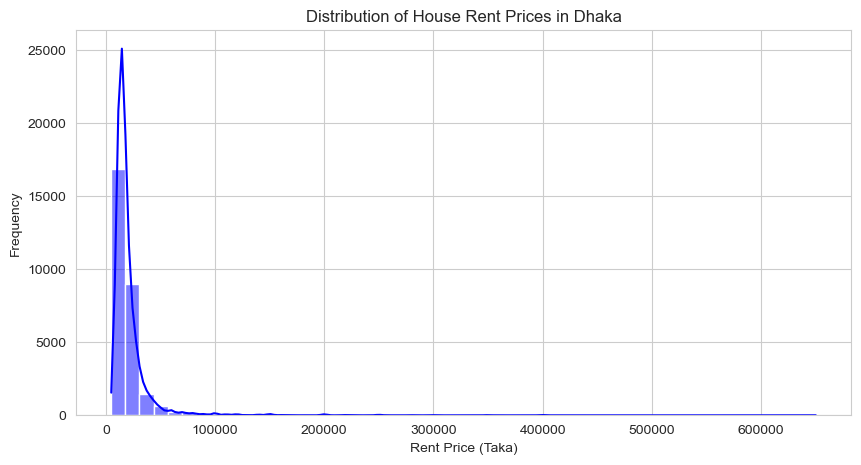

In [41]:

sns.set_style("whitegrid")

# Plot distribution of house rent prices
plt.figure(figsize=(10, 5))
sns.histplot(df1["Price"], bins=50, kde=True, color="blue")
plt.xlabel("Rent Price (Taka)")
plt.ylabel("Frequency")
plt.title("Distribution of House Rent Prices in Dhaka")
plt.show()

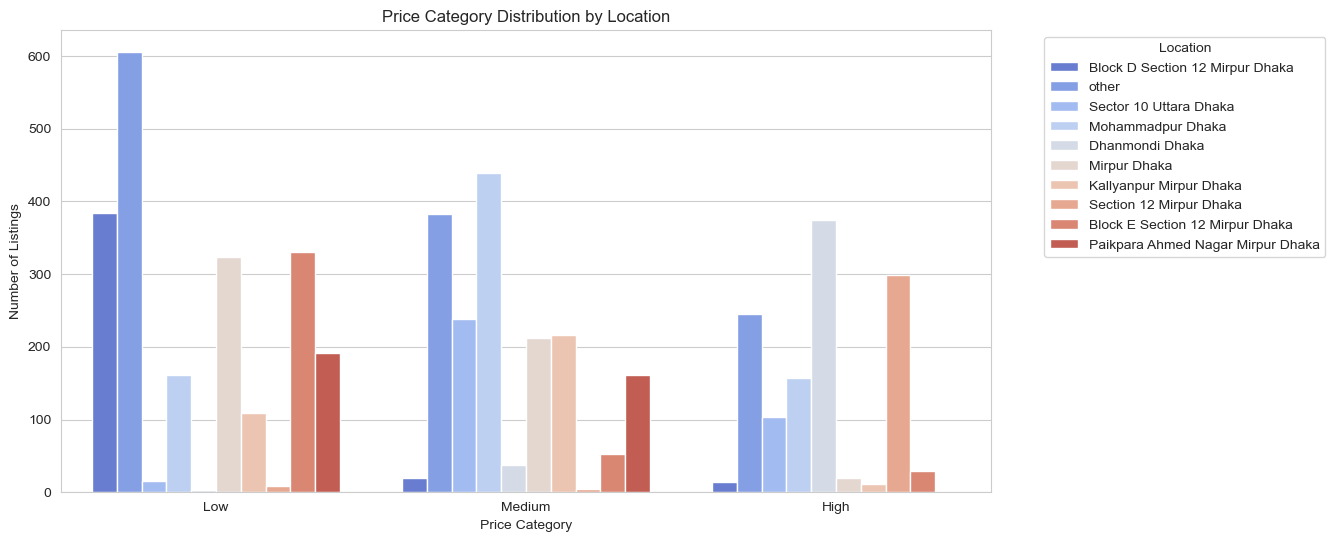

In [65]:
plt.figure(figsize=(12, 6))
top_locations = df1["Location"].value_counts().index[:10]  # Select top 10 locations
sns.countplot(data=df1[df1["Location"].isin(top_locations)], x=df1["Price_Category"], hue="Location", palette="coolwarm")
plt.xlabel("Price Category")
plt.ylabel("Number of Listings")
plt.title("Price Category Distribution by Location")
plt.legend(title="Location", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


<Figure size 1200x600 with 0 Axes>

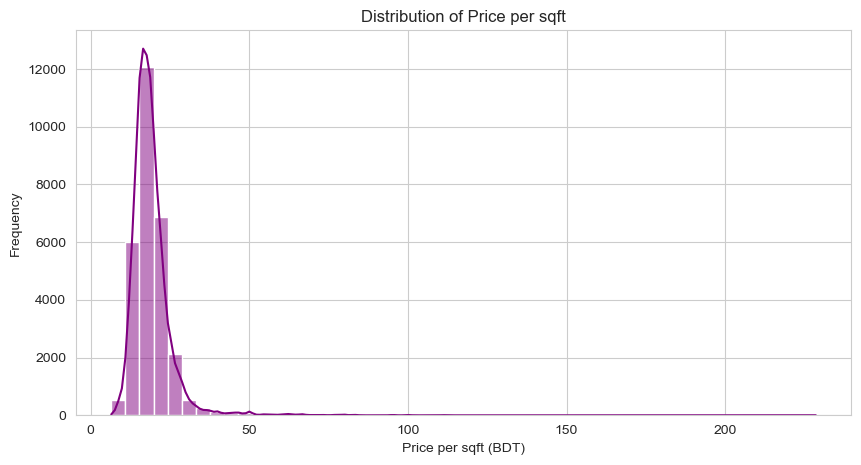

In [43]:
df1["Price_per_sqft"] = df1["Price"] / df1["Area"]

plt.figure(figsize=(10, 5))
sns.histplot(df1["Price_per_sqft"], bins=50, kde=True, color="purple")
plt.xlabel("Price per sqft (BDT)")
plt.ylabel("Frequency")
plt.title("Distribution of Price per sqft")
plt.show()


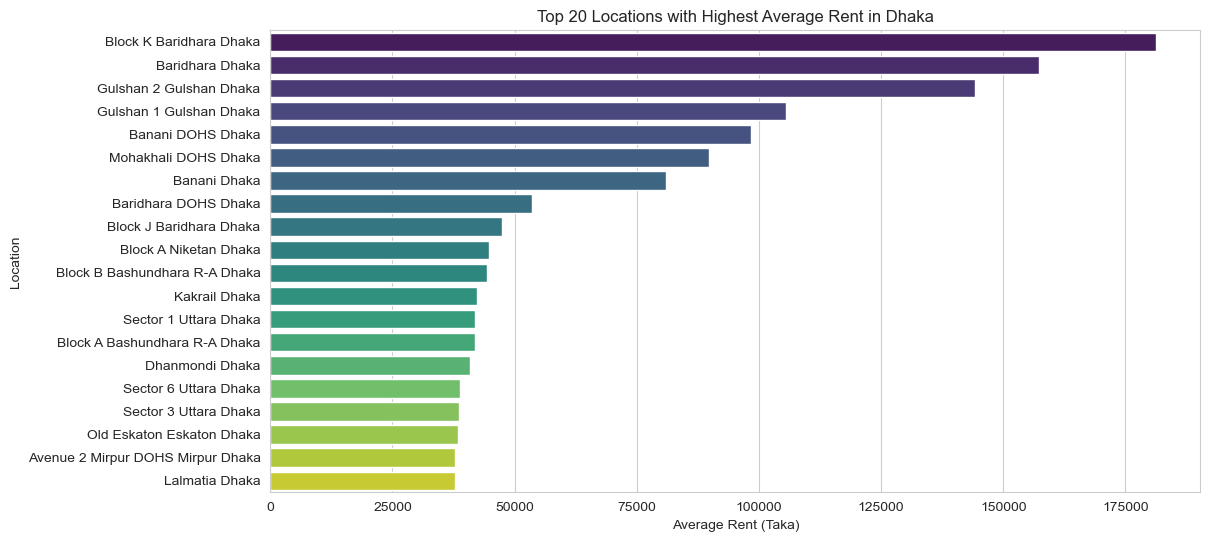

In [44]:
# Group by Location and calculate average rent
location_rent = df1.groupby("Location")["Price"].mean().sort_values(ascending=False).head(20)  # Top 20 locations

# Plot average rent per location
plt.figure(figsize=(12, 6))
sns.barplot(x=location_rent.values, y=location_rent.index, hue=location_rent.index, palette="viridis")
plt.xlabel("Average Rent (Taka)")
plt.ylabel("Location")
plt.title("Top 20 Locations with Highest Average Rent in Dhaka")
plt.show()


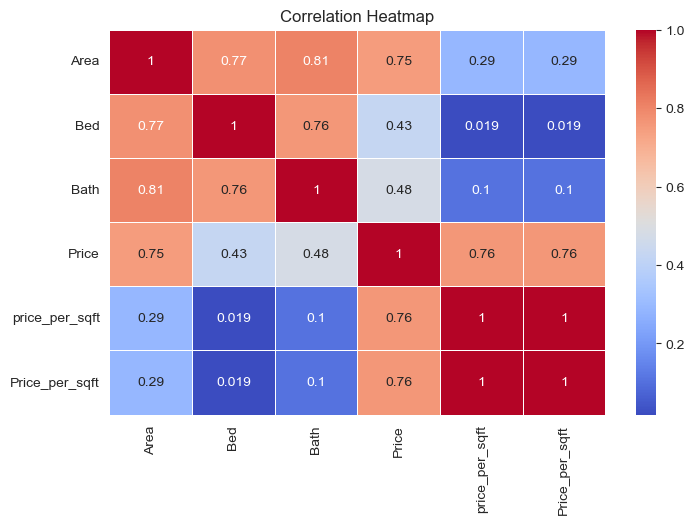

In [45]:
plt.figure(figsize=(8, 5))

# Before creating the correlation heatmap, drop non-numeric columns like Location.
# Selecting only numeric columns
numeric_df = df1.select_dtypes(include=["number"])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


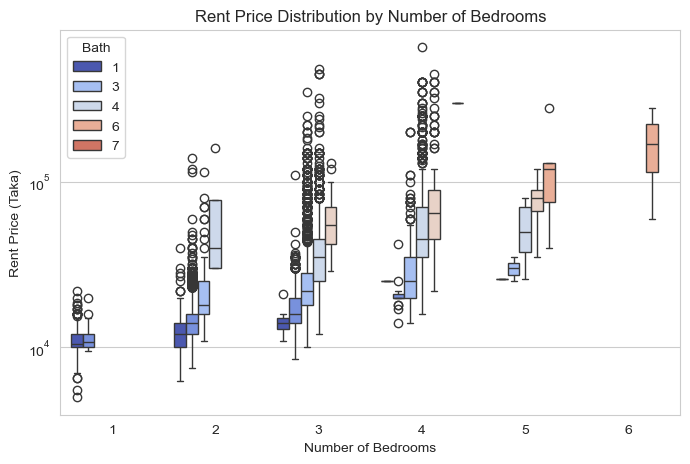

In [46]:
# Plot number of bedrooms vs. rent price
plt.figure(figsize=(8, 5))
sns.boxplot(x=df1["Bed"], y=df1["Price"], hue=df1["Bath"], palette="coolwarm")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Rent Price (Taka)")
plt.title("Rent Price Distribution by Number of Bedrooms")
plt.yscale("log")  # Apply log scale for better visualization
plt.show()


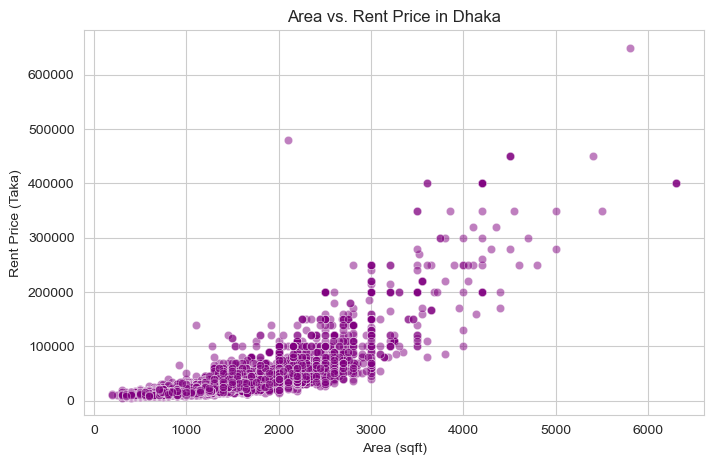

In [47]:
# Scatter plot for Area vs. Rent Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df1["Area"], y=df1["Price"], alpha=0.5, color="purple")
plt.xlabel("Area (sqft)")
plt.ylabel("Rent Price (Taka)")
plt.title("Area vs. Rent Price in Dhaka")
plt.show()


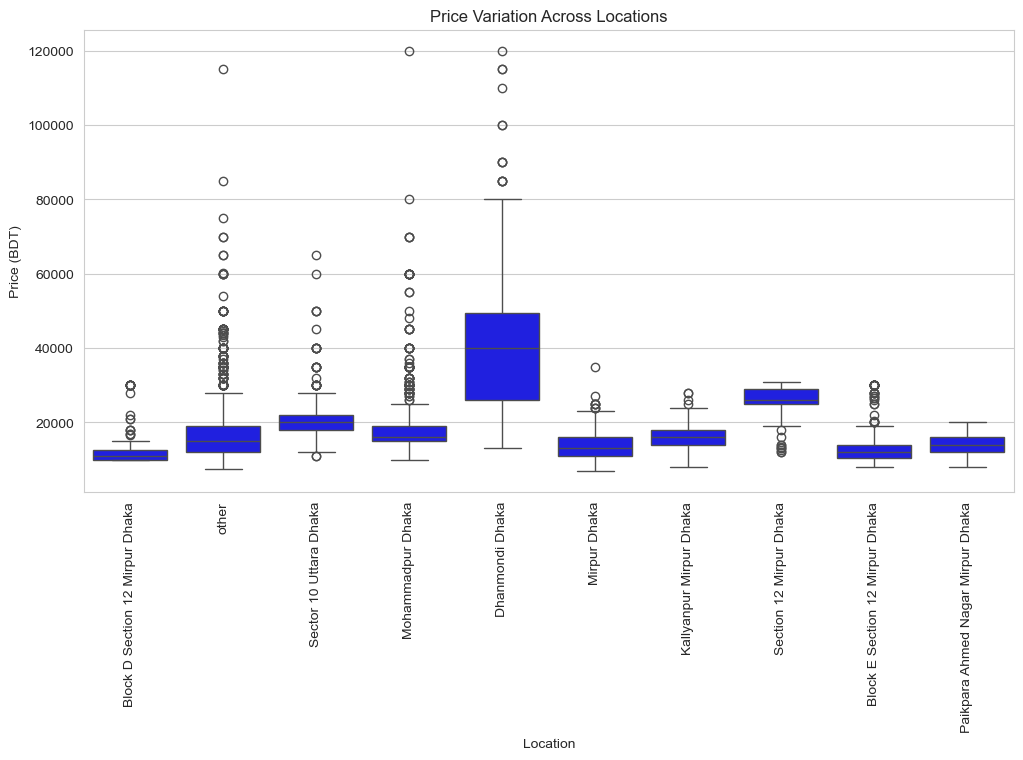

In [48]:
plt.figure(figsize=(12, 6))
top_locations = df1["Location"].value_counts().index[:10]  # Select top 10 locations
sns.boxplot(data=df1[df1["Location"].isin(top_locations)], x="Location", y="Price",color="blue")
plt.xticks(rotation=90)
plt.xlabel("Location")
plt.ylabel("Price (BDT)")
plt.title("Price Variation Across Locations")
plt.show()


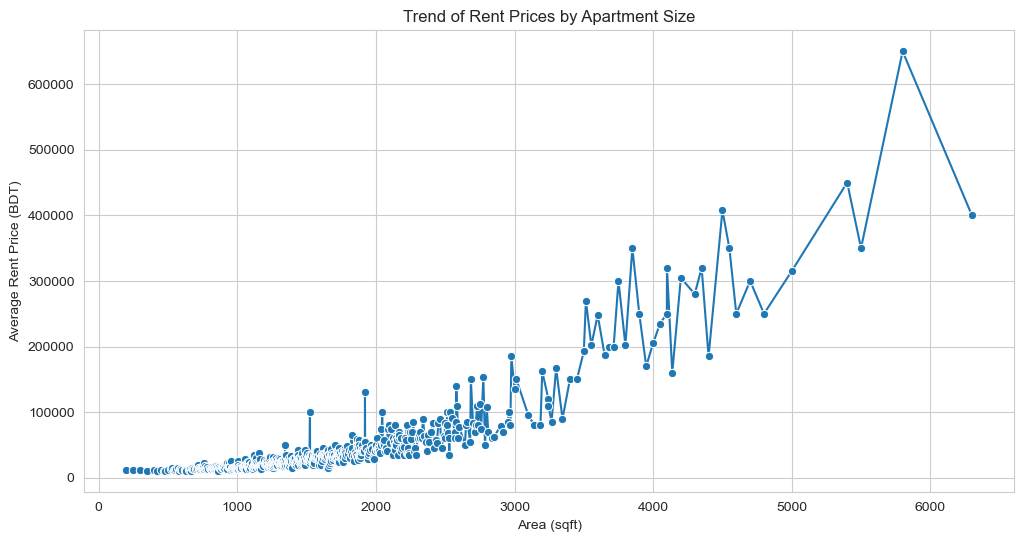

In [49]:
area_groups = df1.groupby("Area")["Price"].mean().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=area_groups.index, y=area_groups.values, marker="o")
plt.xlabel("Area (sqft)")
plt.ylabel("Average Rent Price (BDT)")
plt.title("Trend of Rent Prices by Apartment Size")
plt.show()


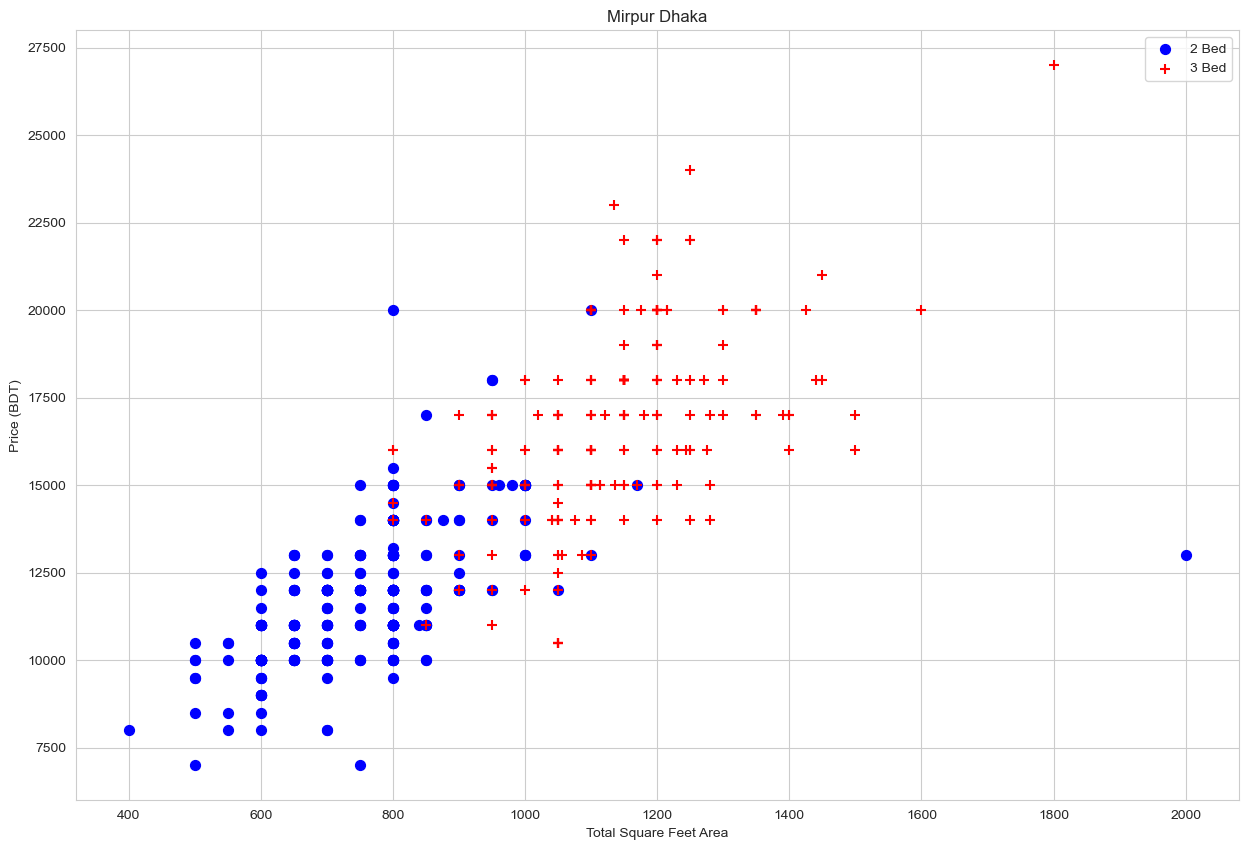

In [50]:
def plot_scatter_chart(df,Location):
    bed2 = df1[(df1.Location==Location) & (df1.Bed==2)]
    bed3 = df1[(df1.Location==Location) & (df1.Bed==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bed2.Area,bed2.Price,color='blue',label='2 Bed', s=50)
    plt.scatter(bed3.Area,bed3.Price,marker='+', color='red',label='3 Bed', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (BDT)")
    plt.title(Location)
    plt.legend()
    plt.show()

plot_scatter_chart(df3,"Mirpur Dhaka")

In [51]:
df3[df3.Bath>df3.Bed+1]

,Location,Area,Bed,Bath,Price,price_per_sqft
747,Avenue 6 Mirpur DOHS Mirpur Dhaka,2175,3,5,42000.0,19.310345
748,Avenue 6 Mirpur DOHS Mirpur Dhaka,2175,3,5,42000.0,19.310345
1227,Banani DOHS Dhaka,3000,3,5,130000.0,43.333333
1271,Banani Dhaka,2410,3,5,80000.0,33.195021
1688,Block A Bashundhara R-A Dhaka,2100,3,5,60000.0,28.571429
1689,Block A Bashundhara R-A Dhaka,2100,3,5,60000.0,28.571429
3967,Block D Bashundhara R-A Dhaka,3000,3,5,55000.0,18.333333
4038,Block D Bashundhara R-A Dhaka,1700,2,4,30000.0,17.647059
4112,Block D Bashundhara R-A Dhaka,2200,3,5,30000.0,13.636364
6097,Block J Baridhara Dhaka,2200,3,5,50000.0,22.727273


In [69]:
dummies = pd.get_dummies(df3.Location)
dummies.head()

,1st Colony Mirpur Dhaka,2nd Colony Mirpur Dhaka,3rd Colony Mirpur Dhaka,Aainusbag Dakshin Khan Dhaka,Abdullahbag Uttar Badda Badda Dhaka,Abdur Rafique Housing Society Shekhertek Mohammadpur Dhaka,Adabor Dhaka,Adarsha Para Uttar Khan Dhaka,Agargaon Dhaka,Ahmed Nagar Mirpur Dhaka,...,West Kazipara Mirpur Dhaka,West Mollartek Dakshin Khan Dhaka,West Monipur Mirpur Dhaka,West Nakhalpara Tejgaon Dhaka,West Rampura Rampura Dhaka,West Shewrapara Mirpur Dhaka,West Vatara Vatara Badda Dhaka,Zafrabad Hazaribag Dhaka,aziz Moholla Mohammadpur Dhaka,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [70]:
df4 = pd.concat([df3,dummies.drop('other',axis='columns')],axis='columns')
df4.head()

,Location,Area,Bed,Bath,Price,price_per_sqft,1st Colony Mirpur Dhaka,2nd Colony Mirpur Dhaka,3rd Colony Mirpur Dhaka,Aainusbag Dakshin Khan Dhaka,...,West Kalachandpur Kalachandpur Dhaka,West Kazipara Mirpur Dhaka,West Mollartek Dakshin Khan Dhaka,West Monipur Mirpur Dhaka,West Nakhalpara Tejgaon Dhaka,West Rampura Rampura Dhaka,West Shewrapara Mirpur Dhaka,West Vatara Vatara Badda Dhaka,Zafrabad Hazaribag Dhaka,aziz Moholla Mohammadpur Dhaka
0,1st Colony Mirpur Dhaka,800,2,2,13500.0,16.875000,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Colony Mirpur Dhaka,700,2,2,12000.0,17.142857,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Colony Mirpur Dhaka,1100,3,3,20000.0,18.181818,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Colony Mirpur Dhaka,1100,3,3,20000.0,18.181818,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Colony Mirpur Dhaka,1020,3,2,15000.0,14.705882,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
df5 = df4.drop('Location',axis='columns')
df5.head()

,Area,Bed,Bath,Price,price_per_sqft,1st Colony Mirpur Dhaka,2nd Colony Mirpur Dhaka,3rd Colony Mirpur Dhaka,Aainusbag Dakshin Khan Dhaka,Abdullahbag Uttar Badda Badda Dhaka,...,West Kalachandpur Kalachandpur Dhaka,West Kazipara Mirpur Dhaka,West Mollartek Dakshin Khan Dhaka,West Monipur Mirpur Dhaka,West Nakhalpara Tejgaon Dhaka,West Rampura Rampura Dhaka,West Shewrapara Mirpur Dhaka,West Vatara Vatara Badda Dhaka,Zafrabad Hazaribag Dhaka,aziz Moholla Mohammadpur Dhaka
0,800,2,2,13500.0,16.875000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,700,2,2,12000.0,17.142857,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1100,3,3,20000.0,18.181818,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1100,3,3,20000.0,18.181818,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1020,3,2,15000.0,14.705882,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [72]:
X = df5.drop(['Price','price_per_sqft'],axis='columns')

In [73]:
X.head()

,Area,Bed,Bath,1st Colony Mirpur Dhaka,2nd Colony Mirpur Dhaka,3rd Colony Mirpur Dhaka,Aainusbag Dakshin Khan Dhaka,Abdullahbag Uttar Badda Badda Dhaka,Abdur Rafique Housing Society Shekhertek Mohammadpur Dhaka,Adabor Dhaka,...,West Kalachandpur Kalachandpur Dhaka,West Kazipara Mirpur Dhaka,West Mollartek Dakshin Khan Dhaka,West Monipur Mirpur Dhaka,West Nakhalpara Tejgaon Dhaka,West Rampura Rampura Dhaka,West Shewrapara Mirpur Dhaka,West Vatara Vatara Badda Dhaka,Zafrabad Hazaribag Dhaka,aziz Moholla Mohammadpur Dhaka
0,800,2,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,700,2,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1100,3,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1100,3,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1020,3,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [74]:
y = df5.Price
y.head()

0    13500.0
1    12000.0
2    20000.0
3    20000.0
4    15000.0
Name: Price, dtype: float64

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=15)

In [76]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
p = lr_clf.score(X_test,y_test)
print("%.2f" % (p*100))

91.61


In [77]:
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=10)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.90241675, 0.90661581, 0.89784529, 0.91364196, 0.90639621])

In [78]:
joblib.dump(X.columns.tolist(), "feature_names.pkl")

['feature_names.pkl']

In [387]:
filename = 'house_rent_model.pkl'
joblib.dump(lr_clf, filename)

['house_rent_model.pkl']

In [384]:
def predict_price(Location, Area, Bed, Bath):
    # Create a DataFrame with correct feature names
    input_data = pd.DataFrame([[Area, Bed, Bath]], columns=["Area", "Bed", "Bath"])

    # Handle Location Encoding (One-Hot Encoding)
    location_columns = X.columns[3:]  # Get all location columns (assuming first 3 are numeric features)
    location_data = pd.DataFrame(np.zeros((1, len(location_columns))), columns=location_columns)

    # If Location exists in training data, set it to 1
    if Location in location_data.columns:
        location_data[Location] = 1

    # Merge numeric and encoded location data
    input_data = pd.concat([input_data, location_data], axis=1)

    # Ensure column order matches training data
    input_data = input_data[X.columns]

    # Predict Price
    price = lr_clf.predict(input_data)[0]
    
    return round(price, 2)

# Test prediction
print(predict_price('Mohammadpur Dhaka', 1200, 3, 3))

24393.29
